In [21]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

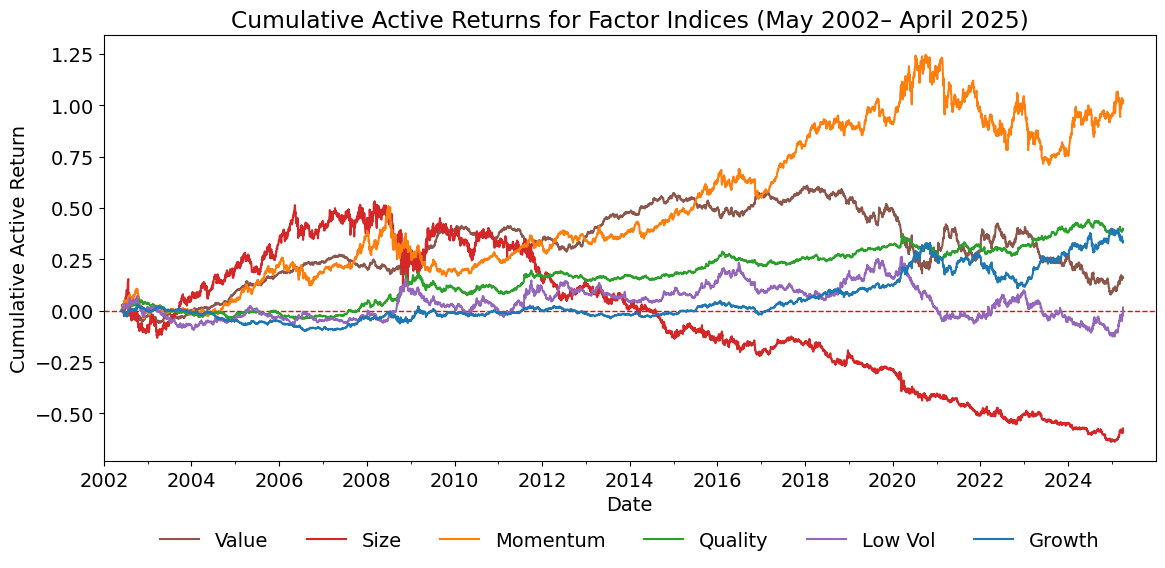

In [ ]:

# 1) Load your data
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# 2) Compute daily excess returns vs. market
factors = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]
excess = df[factors].sub(df["mkt"], axis=0)

# 3) Compound to get cumulative active returns
cum_active = (1 + excess).cumprod() - 1

# 4) Labels & hex‐colours
labels = {
    "vlue": "Value",
    "size": "Size",
    "mtum": "Momentum",
    "qual": "Quality",
    "usmv": "Low Vol",
    "iwf":  "Growth",
}
colors = {
    "iwf":  "#1f77b4",  # Growth (blue)
    "mtum": "#ff7f0e",  # Momentum (orange)
    "qual": "#2ca02c",  # Quality (green)
    "size": "#d62728",  # Size (red)
    "usmv": "#9467bd",  # Low Vol (purple)
    "vlue": "#8c564b",  # Value (brown)
}

# 5) Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.axhline(0, color="red", linestyle="--", linewidth=1)
for col in factors:
    ax.plot(
        cum_active.index, cum_active[col],
        label=labels[col], color=colors[col], linewidth=1.5
    )

# 6) # X-axis: major labels every 2 years, minor ticks every year
ax.set_xlim(pd.to_datetime("2002-01-01"), pd.to_datetime("2025-12-31"))
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

# 7) One-row, full-width legend
ax.legend(
    ncol=len(factors),
    loc="lower center",
    bbox_to_anchor=(0.5, -0.25),
    frameon=False
)

ax.set_title("Cumulative Active Returns for Factor Indices (May 2002–2025)")
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Active Return")
plt.tight_layout()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

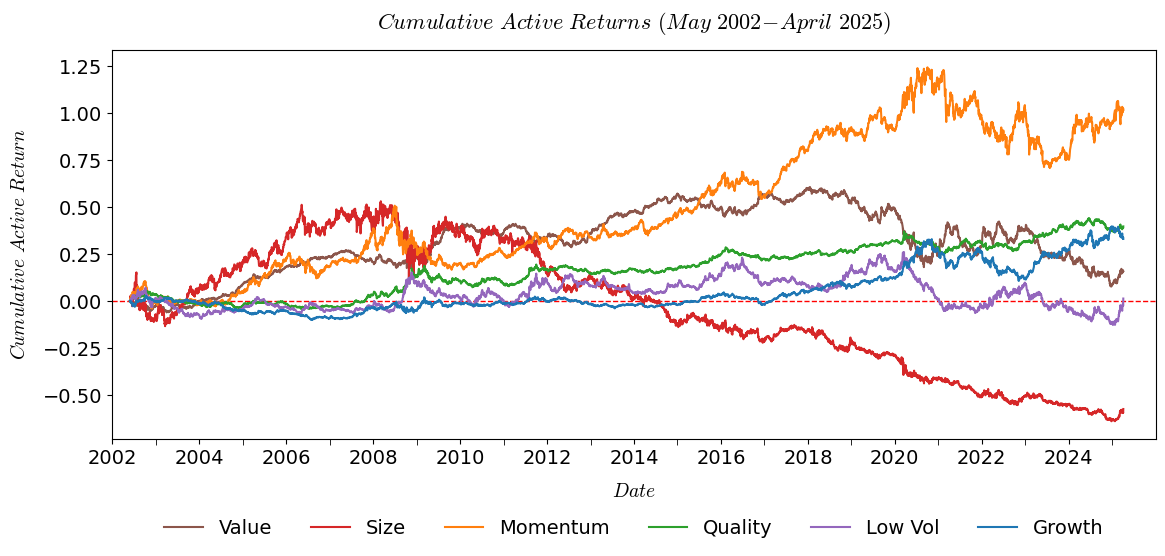

In [35]:
# ─── 0) Matplotlib serif + mathtext, disable external TeX, bump base font ─────
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "font.size": 14,
    "mathtext.fontset": "cm",
    "text.usetex": False,      # ensure we use Matplotlib's math renderer
})

# ─── 1) Load your data ─────────────────────────────────────────────────────────
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# ─── 2) Compute daily excess returns vs. market & cumulative ────────────────
factors    = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]
excess     = df[factors].sub(df["mkt"], axis=0)
cum_active = (1 + excess).cumprod() - 1

# ─── 3) Labels & exact hex-colours ──────────────────────────────────────────
labels = {
    "vlue": "Value",
    "size": "Size",
    "mtum": "Momentum",
    "qual": "Quality",
    "usmv": "Low Vol",
    "iwf":  "Growth",
}
colors = {
    "iwf":  "#1f77b4",  # Growth (blue)
    "mtum": "#ff7f0e",  # Momentum (orange)
    "qual": "#2ca02c",  # Quality (green)
    "size": "#d62728",  # Size (red)
    "usmv": "#9467bd",  # Low Vol (purple)
    "vlue": "#8c564b",  # Value (brown)
}

# ─── 4) Plot lines + zero-line ──────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(12, 6))
ax.axhline(0, color="red", linestyle="--", linewidth=1)

for col in factors:
    ax.plot(
        cum_active.index,
        cum_active[col],
        label=labels[col],
        color=colors[col],
        linewidth=1.5
    )

# ─── 5) X-axis: major tick every 2 yrs, minor tick every 1 yr ──────────────
ax.set_xlim(datetime(2002, 1, 1), datetime(2025, 12, 31))
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis="x", which="minor", length=4)
ax.tick_params(axis="both", which="major", labelsize=14)

# ─── 6) Legend: one row, full width beneath ────────────────────────────────
ax.legend(
    ncol=len(factors),
    loc="lower center",
    bbox_to_anchor=(0.5, -0.30),
    frameon=False,
    prop={"size": 14}
)

# ─── 7) Titles & labels with bold mathtext ─────────────────────────────────
ax.set_title(
    r"$Cumulative\ Active\ Returns\ (May\ 2002\!-\!April\ 2025)$",
    pad=15,
    size=16
)
ax.set_xlabel(r"$Date$", labelpad=10, size=14)
ax.set_ylabel(r"$Cumulative\ Active\ Return$", labelpad=10, size=14)

plt.tight_layout()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

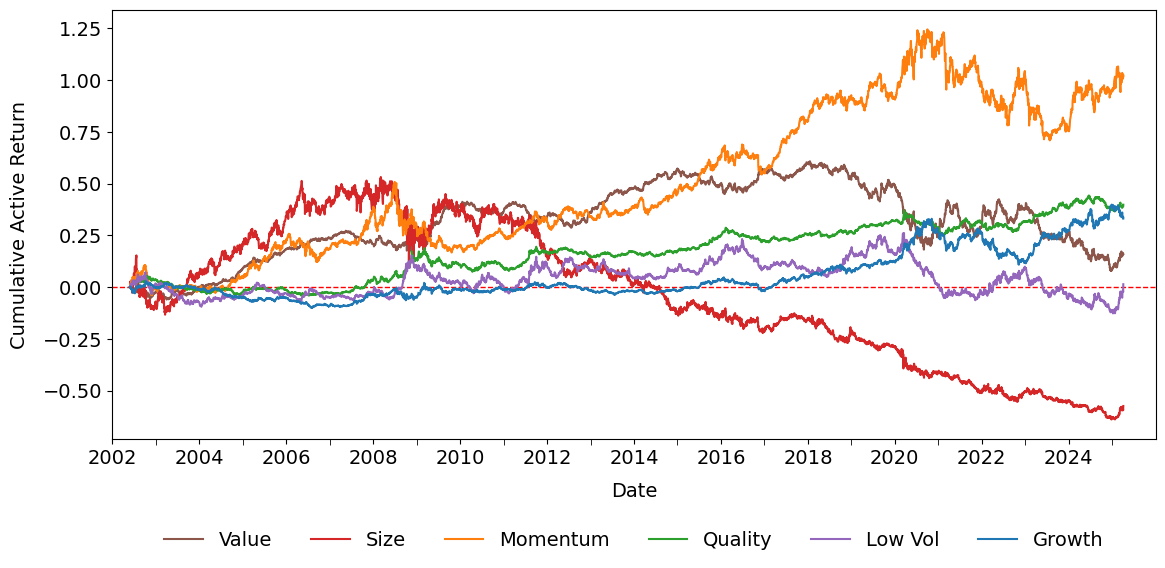

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import glob

# ─── 0) Set Matplotlib font and math rendering ─────────────────────────────
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "font.size": 14,
    "mathtext.fontset": "cm",   # Classic math font
    "text.usetex": False,       # Use internal mathtext rendering
})

# ─── 1) Load your data ─────────────────────────────────────────────────────
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# ─── 2) Compute cumulative active returns ──────────────────────────────────
factors = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]
excess = df[factors].sub(df["mkt"], axis=0)
cum_active = (1 + excess).cumprod() - 1

# ─── 3) Define labels and colors ───────────────────────────────────────────
labels = {
    "vlue": "Value",
    "size": "Size",
    "mtum": "Momentum",
    "qual": "Quality",
    "usmv": "Low Vol",
    "iwf":  "Growth",
}
colors = {
    "iwf":  "#1f77b4",
    "mtum": "#ff7f0e",
    "qual": "#2ca02c",
    "size": "#d62728",
    "usmv": "#9467bd",
    "vlue": "#8c564b",
}

# ─── 4) Plot ───────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(12, 6))
ax.axhline(0, color="red", linestyle="--", linewidth=1)

for col in factors:
    ax.plot(
        cum_active.index,
        cum_active[col],
        label=labels[col],
        color=colors[col],
        linewidth=1.5
    )

# ─── 5) X-axis formatting ──────────────────────────────────────────────────
ax.set_xlim(datetime(2002, 1, 1), datetime(2025, 12, 31))
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis="x", which="minor", length=4)
ax.tick_params(axis="both", which="major", labelsize=14)

# ─── 6) Legend (single row, centered) ──────────────────────────────────────
ax.legend(
    ncol=len(factors),
    loc="lower center",
    bbox_to_anchor=(0.5, -0.30),
    frameon=False,
    prop={"size": 14}
)

# ─── 7) Titles and labels ──────────────────────────────────────────────────
ax.set_title(
    r"",
    pad=15,
    size=16
)
ax.set_xlabel("Date", labelpad=10, size=14)
ax.set_ylabel("Cumulative Active Return", labelpad=10, size=14)

plt.tight_layout()
plt.show()


In [38]:
# 1) Load your data
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# 2) Specify the factor columns and their long–short labels
factors = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]
labels = {
    "vlue": "Value",
    "size": "Size",
    "mtum": "Momentum",
    "qual": "Quality",
    "usmv": "Low Vol",
    "iwf":  "Growth",
}

# 3) Compute the daily long–short returns (excess vs. market)
excess = df[factors].sub(df["mkt"], axis=0)

# 4) Compute the correlation matrix
corr = excess.corr()

# 5) Rename rows & columns to nice labels, round to two decimals
corr = corr.rename(index=labels, columns=labels).round(2)

# 6) (Optional) set pandas float format for pretty printing
pd.options.display.float_format = "{:.2f}".format

# 7) Display the table
print(corr)

          Value  Size  Momentum  Quality  Low Vol  Growth
Value      1.00  0.07     -0.31    -0.16     0.02   -0.63
Size       0.07  1.00      0.02     0.19     0.38   -0.06
Momentum  -0.31  0.02      1.00     0.07     0.09    0.34
Quality   -0.16  0.19      0.07     1.00     0.41    0.27
Low Vol    0.02  0.38      0.09     0.41     1.00   -0.21
Growth    -0.63 -0.06      0.34     0.27    -0.21    1.00


In [40]:

# 1) Load your data
fn = glob.glob("*.csv")[0]
df = pd.read_csv(fn, parse_dates=["date"]).set_index("date")

# 2) Specify the factor columns and their labels
factors = ["vlue", "size", "mtum", "qual", "usmv", "iwf"]
labels = {
    "vlue": "Value",
    "size": "Size",
    "mtum": "Momentum",
    "qual": "Quality",
    "usmv": "Low Vol",
    "iwf":  "Growth",
}

# 3) Compute the correlation matrix on the raw factor returns
raw_corr = df[factors].corr()

# 4) Rename & round
raw_corr = raw_corr.rename(index=labels, columns=labels).round(2)

# 5) Pretty‐print
pd.options.display.float_format = "{:.2f}".format
print(raw_corr)

          Value  Size  Momentum  Quality  Low Vol  Growth
Value      1.00  0.50      0.85     0.94     0.92    0.89
Size       0.50  1.00      0.42     0.46     0.43    0.44
Momentum   0.85  0.42      1.00     0.90     0.87    0.92
Quality    0.94  0.46      0.90     1.00     0.94    0.97
Low Vol    0.92  0.43      0.87     0.94     1.00    0.90
Growth     0.89  0.44      0.92     0.97     0.90    1.00
